In [2]:
%pip install selenium


  Using cached selenium-4.40.0-py3-none-any.whl.metadata (7.7 kB)
  Using cached trio-0.32.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached trio_typing-0.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached types_certifi-2021.10.8.3-py3-none-any.whl.metadata (1.4 kB)
  Using cached types_urllib3-1.26.25.14-py3-none-any.whl.metadata (1.7 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached wsproto-1.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached async_generator-1.10-py3-none-any.whl.metadata (4.9 kB)
  Using cached importlib_metadata-8.7.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached zipp-3.

In [4]:
%pip install webdriver-manager

  Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl.metadata (12 kB)
  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl (27 kB)
Using cached python_dotenv-1.2.1-py3-none-any.whl (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [webdriver-manager]
Note: you may need to restart the kernel to use updated packages.


In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [6]:

def get_chrome_driver():
  #chrome option setting
  chrome_options = webdriver.ChromeOptions()

  #create driver
  driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=chrome_options
  )

  return driver

In [9]:
driver = get_chrome_driver()

In [11]:
driver.get("https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%EB%AA%A8%EB%B0%94%EC%9D%BC&oquery=%EB%AA%A8%EB%B0%94%EC%9D%BC+%EC%8B%A0%EB%B6%84%EC%A6%9D&tqi=jUr2%2FsqVJLUGD%2BzFIzd-517509&ackey=52bub1hu")

In [16]:
driver.execute_script('window.scrollTo(50,2000);')

'<html lang="ko" data-useragent="mozilla/5.0 (macintosh; intel mac os x 10_15_7) applewebkit/537.36 (khtml, like gecko) chrome/144.0.0.0 safari/537.36" data-platform="macintel"><head> <meta charset="utf-8"> <meta name="referrer" content="strict-origin-when-cross-origin">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="모바일 : 네이버 뉴스검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'모바일\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'모바일\'의 네이버 뉴스검색 결과입니다."> <title>모바일 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstati
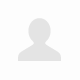
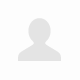

In [18]:
page = driver.page_source
page

In [20]:
driver.quit()

In [74]:
## LG Elec Scraping with selenium

stbm = 'https://www.lge.co.kr/stan-by-me/27lx5qkna'
st_driver = get_chrome_driver()
st_driver.get(stbm)

In [76]:
import time
for i in range(5) :
    st_driver.find_element(By.CSS_SELECTOR, '.btn-review-more').click()
    time.sleep(1)

In [77]:
from bs4 import BeautifulSoup
page = st_driver.page_source
soup = BeautifulSoup(page,'html.parser')
soup
reviews = soup.select('#divReviewList > li')

{'rating': '5점',
 'review': '캠핑용 TV 고민하다가 스탠바이미고로 선택했습니다.집에서도 활용성이 높고 캠핑시 이동에 안전성도 높아 잘선택한듯 합니다.특히 집에서는 LP판으로 음악 듣는것 같아 고급스럽습니다.추석연휴 캠핑을 하고 있는데 비가 많이 와서 활용도가 높네요.안전하게 이동도 가능하여 최고입니다.역시 가전은 LG가 최고',
 'user': '최*규'}

In [69]:
reviews[1]

<li data-model-id="MD10009827" data-review-id="178186">
<!-- 베스트 리뷰, 체험단 리뷰 뱃지가 없는 경우 none-badge 클래스 추가 / 주요항목 평가가 없는 경우 none-rating / 미디어가 없는 경우 none-media -->
<!-- [BTOCSITE-83305] 구독 리뷰 활성화 : 구독 플래그 추가 -->
<!-- [BTOCSITE-83305] 구독 리뷰 활성화 : 구독 플래그 추가-->
<!-- 모든 요소가 있는 경우 -->
<div class="item none-badge">
<div class="score-wrap">
<div class="star-wrap">
<span class="star full"></span>
<span class="star full"></span>
<span class="star full"></span>
<span class="star full"></span>
<span class="star full"></span>
<span class="blind">리뷰 별점 5점 중 <em>5점</em></span>
</div><!-- 5점 : 최고예요! / 4점 : 좋아요! / 3점 : 보통이예요 / 2점 : 그저 그래요 / 1점: 아쉬워요-->
<strong class="txt">최고예요!</strong>
</div>
<div class="badge-wrap">
</div>
<div class="rating-wrap">
<ul class="rating-list">
<li>
<dl>
<dt>화질</dt>
<dd>선명해요</dd>
</dl>
</li>
<li>
<dl>
<dt>사운드</dt>
<dd>우수해요</dd>
</dl>
</li>
<li>
<dl>
<dt>부가기능</dt>
<dd>많아요</dd>
</dl>
</li>
</ul>
</div>
<div class="purchase-info-wrap">
<span class="user-name"><em class="blind"

In [78]:
def get_content(rv):
    return {
        'rating' : rv.select_one('em').text,
        'review' : rv.select_one('p.message').text,
        'user' : rv.select_one('.user-name').text.replace('구매자 이름',"")
    }

rv_list = [get_content(rv) for rv in reviews]
rv_list

[{'rating': '5점',
  'review': '캠핑용 TV 고민하다가 스탠바이미고로 선택했습니다.집에서도 활용성이 높고 캠핑시 이동에 안전성도 높아 잘선택한듯 합니다.특히 집에서는 LP판으로 음악 듣는것 같아 고급스럽습니다.추석연휴 캠핑을 하고 있는데 비가 많이 와서 활용도가 높네요.안전하게 이동도 가능하여 최고입니다.역시 가전은 LG가 최고',
  'user': '최*규'},
 {'rating': '5점',
  'review': '스탠바이미랑 스탠바이미고랑 고민 무진장했는데 집엔 티비가있으니 휴대용인 스탠바이미고 구매했어요! 생각보다 무게는 좀 무겁더라구요 그래도 선 이것저것 연결하는것보다 충전기하나 들고다니는게 더좋은거같아서 후회없어요 !',
  'user': '김*민'},
 {'rating': '5점',
  'review': '아이와 캠핑에서 사용하기 위해서 구입했습니다. 무겁지만 차에 실으면 그만이니 괜찮습니다. 화질이나 화면 크기가 아쉽다는 분들의 글을 보았지만 이 제품은 기실 이동성이 주목적이라 생각하면 납득할 수 있습니다. 캠핑이 아니어도 사용할 수 있습니다. 일부러 집에 TV를 들이지 않거나 빼버리는 집이 많은데 잠깐 필요할 때 꺼내어 보기 좋아요.',
  'user': '김*윤'},
 {'rating': '5점',
  'review': '감성적인 디자인 요소와 세심한 화면 구성이 다양한 소스를 충분히 만족하며 즐길 수 있게 해주고 있어요.돌비 미지원 모델임에도 낭랑한 사운드와 편안한 메뉴 구성이 일품입니다.',
  'user': '이*식'},
 {'rating': '5점',
  'review': '캠핑을 다니기시작하려고 구매했어요. 처음에는 잘 산건가 과소비가 아닌가 싶었는데 왠걸.....특히 사운드 너무 좋구요 화질 좋구요! 어른들도 쉬면서 노래들으니 힐링이에요. 그리고  철수할 때나 텐트안에서 쉴 때 패드로보는 것보다 화면도 크다보니 아이들이 너무 좋아합니다. 추천드립니다.',
  'user': '박*인'},
 {'rating': 

In [79]:
st_driver.quit()